# Read File


In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!ls|grep phone

phone_user_review_file_1.csv
phone_user_review_file_2.csv
phone_user_review_file_3.csv
phone_user_review_file_4.csv
phone_user_review_file_5.csv
phone_user_review_file_6.csv


In [3]:
raw_data=pd.read_csv("phone_user_review_file_1.csv",engine='python')
raw_data['date']=raw_data['date'].apply(lambda date: datetime.strptime(date,"%m/%d/%Y"))
for i in range(2,7):
    temp=pd.read_csv("phone_user_review_file_"+str(i)+".csv",engine='python')
    try:
        temp['date']=temp['date'].apply(lambda date: datetime.strptime(date,"%m/%d/%Y"))
    except:
        temp['date']=temp['date'].apply(lambda date: datetime.strptime(date,"%d/%m/%Y"))
    raw_data=pd.concat([raw_data,temp])

In [4]:
raw_data.head(1)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,2017-05-02,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8


In [5]:
print(raw_data.iloc[0].T)

phone_url                       /cellphones/samsung-galaxy-s8/
date                                       2017-05-02 00:00:00
lang                                                        en
country                                                     us
source                                        Verizon Wireless
domain                                     verizonwireless.com
score                                                       10
score_max                                                   10
extract      As a diehard Samsung fan who has had every Sam...
author                                              CarolAnn35
product                                      Samsung Galaxy S8
Name: 0, dtype: object


In [6]:
len(raw_data)

1415133

In [7]:
max(raw_data['date'])

Timestamp('2017-06-06 00:00:00')

In [8]:
min(raw_data['date'])

Timestamp('1970-01-01 00:00:00')

In [9]:
print(set(raw_data.lang))

{'ja', 'fr', 'fi', 'ar', 'no', 'tr', 'he', 'cs', 'id', 'it', 'de', 'da', 'pl', 'ru', 'es', 'hu', 'ko', 'en', 'nl', 'sv', 'pt', 'zh'}


In [10]:
raw_data.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [11]:
raw_data.iloc[0]['extract']

'As a diehard Samsung fan who has had every Samsung phone since before the S series started, this has been my favorite upgrade so far. I am amazed at some of the reviews and think people may just have a defective device that needs to be replaced. The battery life is amazing.'

# EDA and Preprocessing

In [12]:
raw_data.shape

(1415133, 11)

In [13]:
data=raw_data.dropna(how='any')
data=data[data["lang"]=="en"]

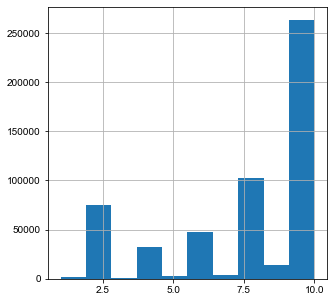

In [14]:
plt.style.use({'figure.figsize':(5, 5)})
data['score'].hist(bins=10)
sns.set_style("whitegrid")
sns.set_context("poster")

In [15]:
pd.DataFrame(data.groupby("domain").size().sort_values(ascending=False),columns=['sales'])[:10]

,sales
domain,
amazon.com,214435
amazon.in,112878
amazon.co.uk,65832
samsung.com,37807
phonearena.com,21815
phonescoop.com,16905
ciao.co.uk,8640
dooyoo.co.uk,8139
amazon.ca,8055


In [16]:
data=data[['domain','score','extract']]

In [17]:
data.head(1)

,domain,score,extract
0,verizonwireless.com,10.0,As a diehard Samsung fan who has had every Sam...


In [18]:
data=data.reset_index(drop=True)
data["Score"]=np.nan
for domain in set(data['domain']):
    scores=data[data['domain']==domain]["score"]
    data.loc[[i for i,x in enumerate(data['domain']==domain) if x],"Score"]=(data[data['domain']==domain]["score"]-np.mean(scores))/np.std(scores)
data['Length of Review']=data['extract'].apply(lambda x:len(x))
data.head(1)

,domain,score,extract,Score,Length of Review
0,verizonwireless.com,10.0,As a diehard Samsung fan who has had every Sam...,0.640085,274


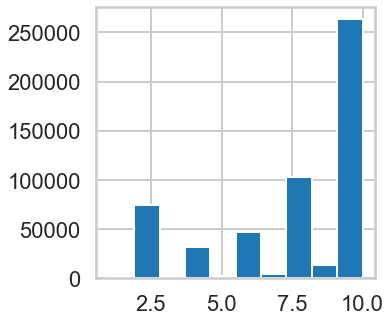

In [19]:
plt.style.use({'figure.figsize':(5, 5)})
data['score'].hist(bins=10)
sns.set_style("whitegrid")
sns.set_context("poster")

In [20]:
data=data[["domain","Score","extract"]]
data=data.rename(columns={"domain":"Domain","extract":"Review"})
data.head(1)

,Domain,Score,Review
0,verizonwireless.com,0.640085,As a diehard Samsung fan who has had every Sam...


In [21]:
data.to_csv("Data_For_Tableau.csv")

In [22]:
df=pd.read_csv("Data_For_Tableau.csv")[['Domain','Score']]
df.groupby("Domain").mean()

,Score
Domain,
91mobiles.com,-1.329870e-17
CompareStorePrices.co.uk,-1.864124e-16
abt.com,2.379049e-16
afterdawn.com,8.976271e-17
ainol-novo.com,-5.921189e-16
...,...
verdicts.co.uk,NaN
verizonwireless.com,-1.362801e-15
very.co.uk,-2.003696e-15


In [23]:
df.groupby("Domain").std()

,Score
Domain,
91mobiles.com,1.000246
CompareStorePrices.co.uk,1.013794
abt.com,1.080123
afterdawn.com,1.003565
ainol-novo.com,1.224745
...,...
verdicts.co.uk,NaN
verizonwireless.com,1.000133
very.co.uk,1.000367


array([[<AxesSubplot:title={'center':'Score'}>]], dtype=object)

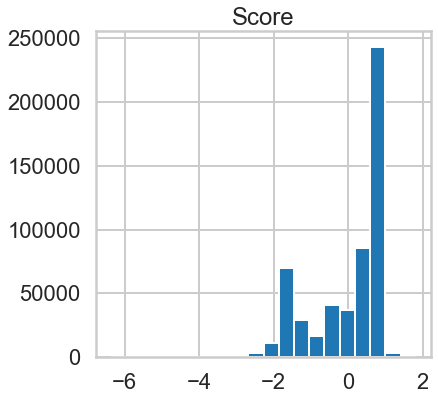

In [24]:
plt.style.use({'figure.figsize':(6, 6)})
sns.set_style("whitegrid")
sns.set_context("poster")
data.hist(bins=20)


# Sentiment Analysis

In [25]:
data=data[np.logical_or(data["Score"]<np.nanpercentile(data["Score"],20),data["Score"]>np.nanpercentile(data["Score"],80))]
data

,Domain,Score,Review
1,phonearena.com,0.934538,Love the phone. the phone is sleek and smooth ...
4,verizonwireless.com,-1.575412,I've now found that i'm in a group of people t...
6,verizonwireless.com,-1.575412,The way this Samsung S8 phone operates is more...
15,reviews.cnet.com,1.038539,I moved from the S7 Edge and love this phone. ...
25,verizonwireless.com,-2.313911,BUYER BEWARE: My wife and I both upgraded to t...
...,...,...,...
543193,ciao.co.uk,-1.115697,This phone is OK. It's very basic and does a j...
543194,dooyoo.co.uk,-1.791957,This is an alright phone. It really isn't very...
543195,ciao.co.uk,-2.164052,Dont bother even considering to buy one of the...
543196,ciao.co.uk,-2.164052,The phone in the picture (unless they have cha...


In [26]:
data['Score']=data['Score'].apply(lambda x:x>0)
sentiment_analysis_data=data

In [27]:
sentiment_analysis_data=sentiment_analysis_data.sample(10000)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
    
X = sentiment_analysis_data['Review']
y = sentiment_analysis_data['Score']>0.5
vectorizer = TfidfVectorizer(stop_words='english',min_df=5).fit(X)
pd.DataFrame(vectorizer.idf_,index=vectorizer.get_feature_names(),columns=['IDF Value']).sort_values('IDF Value').T

,phone,good,great,battery,camera,like,screen,love,just,use,...,interesting,investment,invite,stabilization,duration,appeared,duos,driving,j5,korean
IDF Value,1.533512,2.767948,2.880691,3.201031,3.422595,3.433933,3.436216,3.438505,3.440798,3.481812,...,8.418681,8.418681,8.418681,8.418681,8.418681,8.418681,8.418681,8.418681,8.418681,8.418681


In [29]:
X= vectorizer.transform(X).toarray()
pd.DataFrame(X,columns=vectorizer.get_feature_names())

,00,000,07,10,100,1000,1020,1080p,10k,11,...,youtube,yr,yu,z1,z3,zenfone,zero,zoom,zte,zuk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('max_colwidth',30)
pd.set_option("display.precision", 2)
pd.DataFrame(np.hstack([np.vstack([X,np.sum(X,axis=0).reshape(1,-1)]),
                        np.vstack([np.sum(X,axis=1).reshape(-1,1),np.array([np.nan]).reshape(1,-1)])
                       ])
             ,index=list(range(10000))+['Sum']
             ,columns=vectorizer.get_feature_names()+['Sum'])

,00,000,07,10,100,...,zero,zoom,zte,zuk,Sum
0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,1.93
1,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,4.51
2,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,1.39
3,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,1.38
4,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,1.99
...,...,...,...,...,...,...,...,...,...,...,...
9996,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,4.40
9997,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,3.63
9998,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,3.34
9999,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,3.49


In [31]:
import statsmodels.api as sm

In [32]:
X = sm.add_constant(X)
X=pd.DataFrame(X,columns=['b0']+vectorizer.get_feature_names())
model = sm.OLS(list(y),X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     6.553
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        09:17:43   Log-Likelihood:                -810.70
No. Observations:               10000   AIC:                             7011.
Df Residuals:                    7305   BIC:                         2.644e+04
Df Model:                        2694                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
b0                 0.4940      0.015     31.900      0.000       0.464       0.524
00                -0.4481      0.267     -1.680      0.093      -0.971       0.075
000                0.7651      0.272      2.811      0.005       0.231       1.299
07                -0.1571      0.568     -0.276      0.782      -1.271       0.957
10                -0.0965      0.112     -0.858      0.391      -0.317       0.124
100                0.2325      0.101      2.307      0.021       0.035       0.430
1000               0.1138      0.325      0.350      0.726      -0.523       0.750
1020               0.5127      0.447      1.146      0.252      -0.364       1.390
1080p              0.1928      0.538      0.359      0.720      -0.861       1.247
10k                0.3792      0.248      1.526      0.127      -0.108       0.866
11                 0.2650      0.279      0.951      0.342      -0.281       0.811
12                -0.2344      0.241     -0.974      0.330      -0.706       0.237
128                1.9599      0.660      2.970      0.003       0.666       3.253
128gb              0.4626      0.336      1.376      0.169      -0.196       1.121
13                -0.3847      0.263     -1.463      0.144      -0.900       0.131
13mp               0.0940      0.432      0.218      0.828      -0.752       0.940
14                 0.0296      0.292      0.101      0.919      -0.543       0.602
15                -0.0252      0.177     -0.142      0.887      -0.372       0.321
150               -0.1926      0.552     -0.349      0.727      -1.275       0.890
1520               0.0507      0.627      0.081      0.936      -1.178       1.279
15k               -0.1640      0.391     -0.420      0.675      -0.930       0.602
16                 0.3605      0.203      1.777      0.076      -0.037       0.758
16gb              -0.5127      0.199     -2.570      0.010      -0.904      -0.122
16mp               1.1177      0.460      2.431      0.015       0.217       2.019
17                -0.1560      0.398     -0.392      0.695      -0.936       0.624
18                -0.0854      0.287     -0.297      0.766      -0.649       0.478
1gb                0.8020      0.437      1.836      0.066      -0.055       1.658
1st                0.1892      0.243      0.777      0.437      -0.288       0.666
20                -0.1814      0.176     -1.032      0.302      -0.526       0.163
200               -0.1395      0.250     -0.558      0.577      -0.629       0.350
2000               0.0883      0.564      0.157      0.876      -1.017       1.194
2007              -0.9350      0.445     -2.101      0.036      -1.807      -0.063
2008              -0.6640      0.408     -1.626      0.104      -1.465       0.137
2010              -0.2279      0.495     -0.461      0.645      -1.198       0.742
2011        

In [33]:
coef=dict()
for i in result.params.to_dict().keys():
    coef[i]=[result.params[i],result.pvalues.to_dict()[i]]
coef_P=pd.DataFrame(coef,index=["coef","P Value"]).T.drop(index=['b0'])
coef_P.loc[coef_P["P Value"]<=0.05].dropna().sort_values(by=['coef'],key=lambda x:abs(x),ascending=False).head(20)

,coef,P Value
128,1.96,2.99e-03
action,-1.75,3.59e-06
ace,-1.74,8.77e-05
existent,-1.70,2.27e-03
fi,1.69,2.94e-02
...,...,...
picked,1.36,2.48e-04
project,-1.31,2.94e-02
somebody,-1.30,1.17e-03
isnt,-1.28,1.19e-05


In [34]:
coef_P.loc[coef_P["P Value"]<=0.05].dropna().sort_values(by=['coef'],ascending=False).head(20)

,coef,P Value
128,1.96,2.99e-03
fi,1.69,2.94e-02
rim,1.60,5.69e-03
nervous,1.59,3.95e-04
documents,1.55,2.33e-03
...,...,...
surfing,1.05,2.28e-03
motion,1.04,2.97e-02
unlimited,1.03,1.72e-03
buyers,1.02,5.62e-03


In [35]:
coef_P.loc[coef_P["P Value"]<=0.05].dropna().sort_values(by=['coef'],ascending=True).head(20)

,coef,P Value
action,-1.75,3.59e-06
ace,-1.74,8.77e-05
existent,-1.70,2.27e-03
uno,-1.66,5.07e-03
wi,-1.55,4.99e-02
...,...,...
uninstalled,-1.16,2.25e-02
controls,-1.15,2.07e-02
frustrating,-1.15,8.54e-06
warn,-1.12,7.37e-03


# sentiment classification

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,log_loss,accuracy_score,classification_report
from sklearn.metrics import precision_score
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme("paper")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [37]:
def report(y_pred,y_test):
    print(classification_report(y_pred,y_test,target_names=['Negative','Positive'],zero_division=0))
    print("Accuracy: %f" % accuracy_score(y_pred,y_test))
    print("Weighted Precision :%f" % precision_score(y_pred,y_test,average="weighted"))
    cm=confusion_matrix(y_pred,y_test)
    g=sns.heatmap(cm,annot=True,fmt='d',linewidths=1,linecolor='black',
                      annot_kws={"size":14},cmap='Spectral',cbar=False)
    g.set_xticklabels(['Negative','Positive'],fontsize = 14,rotation=90)
    g.set_yticklabels(['Negative','Positive'],fontsize = 14,rotation=90)

    plt.xlabel('Actual',size=14)
    plt.ylabel('Predicted',size=14)
    plt.title('Confusion Matrix \n ',size=16)
    plt.show()
    return

In [38]:
result={}

## >Multinomial NB

              precision    recall  f1-score   support

    Negative       0.89      0.69      0.78       983
    Positive       0.83      0.94      0.88      1517

    accuracy                           0.84      2500
   macro avg       0.86      0.82      0.83      2500
weighted avg       0.85      0.84      0.84      2500

Accuracy: 0.844800
Weighted Precision :0.850001


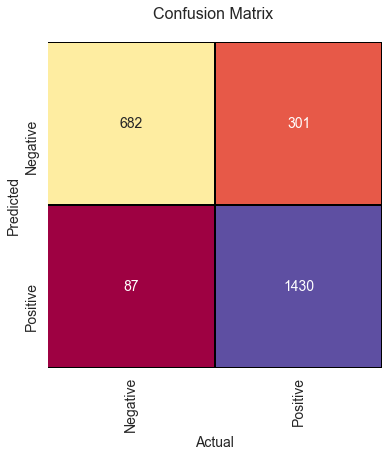

In [39]:
from sklearn.naive_bayes import MultinomialNB
clf_1 = MultinomialNB()
clf_1.fit(X_train, y_train)
y_pred=clf_1.predict(X_test)
result["Multinomial NB"]=accuracy_score(y_pred,y_test)
report(y_test,y_pred)

## >Linear Regression

              precision    recall  f1-score   support

    Negative       0.77      0.74      0.75       983
    Positive       0.84      0.85      0.84      1517

    accuracy                           0.81      2500
   macro avg       0.80      0.80      0.80      2500
weighted avg       0.81      0.81      0.81      2500

Accuracy: 0.809600
Weighted Precision :0.808628


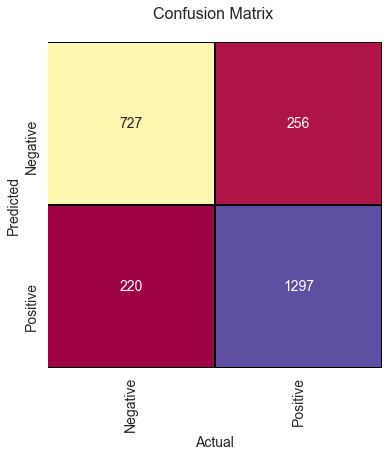

In [40]:
from sklearn.linear_model import LinearRegression
clf_2 = LinearRegression()
clf_2.fit(X_train, y_train)
y_pred=clf_2.predict(X_test)>0.5
report(y_test,y_pred)

## >Logistic Regression

              precision    recall  f1-score   support

    Negative       0.86      0.79      0.83       983
    Positive       0.87      0.92      0.90      1517

    accuracy                           0.87      2500
   macro avg       0.87      0.86      0.86      2500
weighted avg       0.87      0.87      0.87      2500

Accuracy: 0.869600
Weighted Precision :0.869309


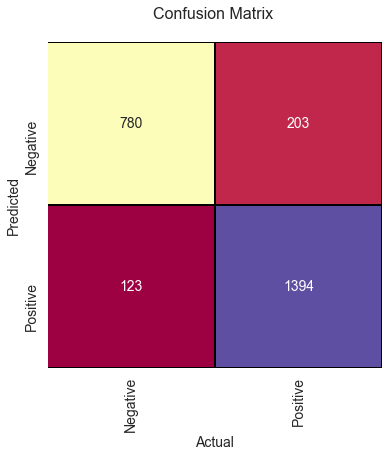

In [41]:
from sklearn.linear_model import LogisticRegression
clf_3 = LogisticRegression()
clf_3.fit(X_train, y_train)
y_pred=clf_3.predict(X_test)
report(y_test,y_pred)
result["Logistic Regression"]=accuracy_score(y_pred,y_test)

## >Decision Tree

              precision    recall  f1-score   support

    Negative       0.72      0.68      0.70       983
    Positive       0.80      0.83      0.81      1517

    accuracy                           0.77      2500
   macro avg       0.76      0.76      0.76      2500
weighted avg       0.77      0.77      0.77      2500

Accuracy: 0.771200
Weighted Precision :0.769527


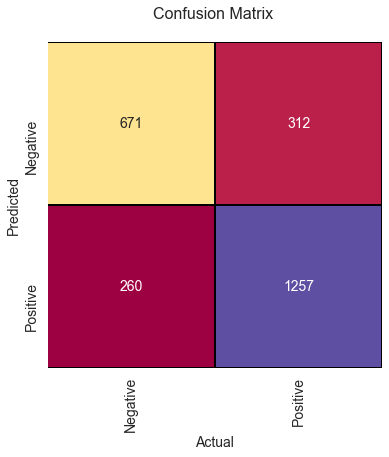

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf_4 = DecisionTreeClassifier()
clf_4.fit(X_train, y_train)
y_pred=clf_4.predict(X_test)
report(y_test,y_pred)
result["Decision Tree"]=accuracy_score(y_pred,y_test)

              precision    recall  f1-score   support

    Negative       0.88      0.76      0.81       983
    Positive       0.86      0.93      0.89      1517

    accuracy                           0.86      2500
   macro avg       0.87      0.85      0.85      2500
weighted avg       0.87      0.86      0.86      2500

Accuracy: 0.864000
Weighted Precision :0.865019


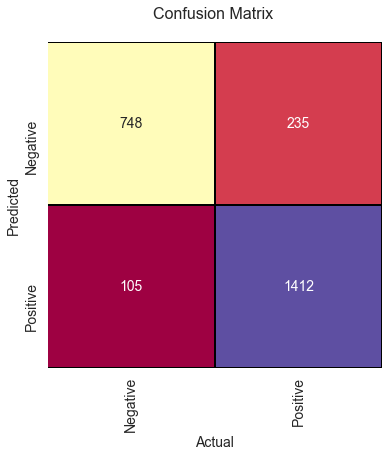

In [43]:
from sklearn.ensemble import VotingClassifier
clf=VotingClassifier(estimators=[('Multinomial NB', MultinomialNB()), ('LogisticRegression',LogisticRegression()), ('DecisionTreeClassifier', DecisionTreeClassifier())], voting='hard')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
report(y_test,y_pred)
result["Voting Classifier"]=accuracy_score(y_pred,y_test)

In [44]:
pd.DataFrame.from_dict(result,columns=["Accuracy"], orient='index')

,Accuracy
Multinomial NB,0.84
Logistic Regression,0.87
Decision Tree,0.77
Voting Classifier,0.86


# Sales Prediction

In [45]:
raw_data_2=pd.read_csv("olist_orders_dataset.csv")
raw_data_2['date']=pd.to_datetime(raw_data_2['order_purchase_timestamp']).apply(lambda x:datetime(x.year,x.month,x.day))


In [46]:
len(raw_data_2)

99441

In [47]:
raw_data_2.head(1).T

,0
order_id,e481f51cbdc54678b7cc49136f...
customer_id,9ef432eb6251297304e76186b1...
order_status,delivered
order_purchase_timestamp,2017-10-02 10:56:33
order_approved_at,2017-10-02 11:07:15
order_delivered_carrier_date,2017-10-04 19:55:00
order_delivered_customer_date,2017-10-10 21:25:13
order_estimated_delivery_date,2017-10-18 00:00:00
date,2017-10-02 00:00:00


In [48]:
daily_sales=raw_data_2.groupby("date").size()
daily_sales

date
2016-09-04    1
2016-09-05    1
2016-09-13    1
2016-09-15    1
2016-10-02    1
             ..
2018-09-29    1
2018-10-01    1
2018-10-03    1
2018-10-16    1
2018-10-17    1
Length: 634, dtype: int64

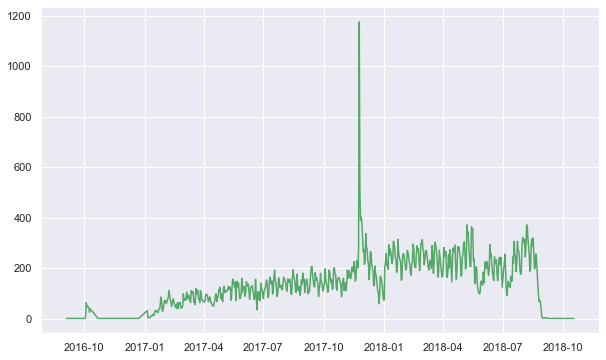

In [49]:
sns.set_style('white')
sns.set(rc={'figure.figsize':(10,6)})
plt.plot(daily_sales,'g-')

In [50]:
daily_sales=daily_sales.reindex(pd.date_range(min(daily_sales.index),max(daily_sales.index)),fill_value=0)

In [51]:
daily_sales=pd.DataFrame(daily_sales,columns=["Sales"])

## Preprocess

In [52]:
def preprocess(X):
    Data=pd.DataFrame(X,columns=['Sales'])
    for i in range(len(X)):
        year=Data.index[i].year
        month=Data.index[i].month
        X.loc[Data.index[i],'Date']="{}/{}".format(year,month) 
    history=X.groupby('Date').sum()
    for k in range(len(Data.index)):
        j=Data.index[k]
        year=j.year
        month=j.month
        loc=list(history.index).index("{}/{}".format(year,month))
        Data.loc[j,"1 day before"]= Data.loc[Data.index[k-1],"Sales"]
        Data.loc[j,"2 day before"]= Data.loc[Data.index[k-2],"Sales"]
        Data.loc[j,"5 day before"]= Data.loc[Data.index[k-5],"Sales"]
        Data.loc[j,"Last 1 Month"]=np.sum(history.iloc[loc-30:loc]['Sales'])
        Data.loc[j,"Last 2 Month"]=np.sum(history.iloc[loc-60:loc-30]['Sales'])
    Data=Data.apply(pd.to_numeric)
    return Data

In [53]:
def preprocess_with_dayofweek(input_data):
    X=input_data
    Data=pd.DataFrame(X,columns=['Sales'])
    for i in range(len(X)):
        X.loc[Data.index[i],'dayofweek']=Data.index[i].dayofweek
    
    Data=pd.get_dummies(X['dayofweek'])
    Data=Data.apply(pd.to_numeric)
    Data.columns=map(lambda x:"Day {} of the week".format(int(x)),Data.columns)
    return Data

In [54]:
dayofweek_data=preprocess_with_dayofweek(daily_sales)

In [55]:
import statsmodels.api as sm
X = sm.add_constant(dayofweek_data)
X=pd.DataFrame(X)
model = sm.OLS(daily_sales.values[:,0],X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     3.451
Date:                Thu, 20 May 2021   Prob (F-statistic):            0.00227
Time:                        09:18:11   Log-Likelihood:                -4685.9
No. Observations:                 774   AIC:                             9386.
Df Residuals:                     767   BIC:                             9418.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               112.3903      3.256     34.520      0.000     105.999     118.782
Day 0 of the week    33.5197      9.111      3.679      0.000      15.635      51.405
Day 1 of the week    31.4206      9.111      3.449      0.001      13.536      49.306
Day 2 of the week    27.7179      9.111      3.042      0.002       9.833      45.603
Day 3 of the week    21.8007      9.147      2.383      0.017       3.845      39.756
Day 4 of the week    15.9916      9.147      1.748      0.081      -1.964      33.947
Day 5 of the week   -13.4175      9.147     -1.467      0.143     -31.373       4.538
Day 6 of the week    -4.6425      9.111     -0.510      0.611     -22.528      13.243
==============================================================================
Omnibus:                      335.309   Durbin-Watson:                   0.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5450.353
Skew:                           1.519   Prob(JB):                         0.00
Kurtosis:                      15.640   Cond. No.                     1.24e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.72e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
data=preprocess(daily_sales)
train_test_data=data[datetime(2017,1,1):datetime(2018,3,1)]

In [57]:
X=train_test_data.drop(columns=["Sales"])
y=train_test_data["Sales"]

In [58]:
X_train=X[:datetime(2017,12,31)]
y_train=y[:datetime(2017,12,31)]
X_test=X[datetime(2018,1,1):datetime(2018,3,1)]
y_test=y[datetime(2018,1,1):datetime(2018,3,1)]

In [59]:
len(y_test)

60

In [60]:
X_train.head(1)

,1 day before,2 day before,5 day before,Last 1 Month,Last 2 Month
2017-01-01,0.0,0.0,0.0,329.0,0.0


In [61]:
len(X_train)

365

In [62]:
len(X_test)

60

In [63]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(y_train,seasonal=True,error_action='ignore',suppress_warnings=True, )
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -1989.834
Date:                Thu, 20 May 2021   AIC                           3985.668
Time:                        09:18:15   BIC                           3997.359
Sample:                             0   HQIC                          3990.315
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5232      0.022    -23.275      0.000      -0.567      -0.479
ma.L2         -0.2261      0.070     -3.211      0.001      -0.364      -0.088
sigma2      3272.4779     30.391    107.678      0.000    3212.912    3332.044
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            587828.31
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              30.98   Skew:                            11.93
Prob(H) (two-sided):                  0.00   Kurtosis:                       198.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

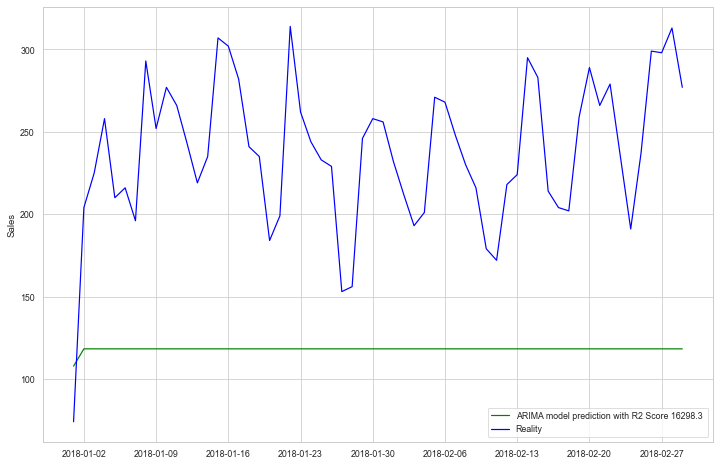

In [64]:
arima_pred=stepwise_fit.predict(n_periods=60)
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme("paper")
sns.set_style("whitegrid")
plt.style.use({'figure.figsize':(12, 8)})

sns.lineplot(x=X_test.index,y=arima_pred,label='ARIMA model prediction with R2 Score %.1f '%(mean_squared_error(arima_pred,y_test)),color='green')
sns.lineplot(x=X_test.index,y=y_test,label='Reality',color='blue')
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())

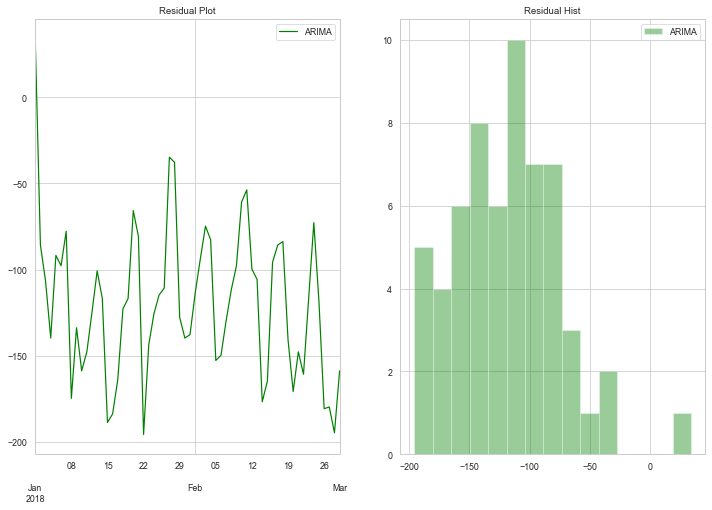

In [65]:
sns.set_theme("paper")
sns.set_style("whitegrid")
plt.style.use({'figure.figsize':(12, 8)})

plt.subplot(121)
plt.title("Residual Plot")
(arima_pred-y_test).plot(color='green',label='ARIMA')
plt.legend()
plt.subplot(122)
plt.title("Residual Hist")
(arima_pred-y_test).hist(bins=15,color='green',alpha=0.4,label='ARIMA')
plt.legend()

In [66]:
import statsmodels.api as sm
X = sm.add_constant(X)
X=pd.DataFrame(X)
model = sm.OLS(list(y),X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     126.5
Date:                Thu, 20 May 2021   Prob (F-statistic):           2.08e-81
Time:                        09:18:16   Log-Likelihood:                -2316.8
No. Observations:                 425   AIC:                             4646.
Df Residuals:                     419   BIC:                             4670.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           25.6929      7.859      3.269      0.001      10.245      41.141
1 day before     0.5470      0.049     11.186      0.000       0.451       0.643
2 day before     0.1203      0.050      2.421      0.016       0.023       0.218
5 day before     0.1494      0.041      3.611      0.000       0.068       0.231
Last 1 Month    -0.0005      0.001     -1.034      0.302      -0.002       0.000
Last 2 Month     0.0006      0.000      2.281      0.023    7.94e-05       0.001
==============================================================================
Omnibus:                      773.268   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           634364.444
Skew:                          11.140   Prob(JB):                         0.00
Kurtosis:                     190.954   Cond. No.                     5.99e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

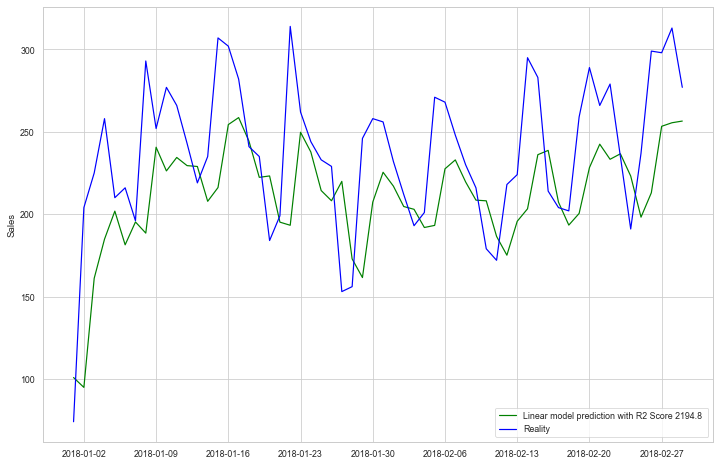

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme("paper")
sns.set_style("whitegrid")
plt.style.use({'figure.figsize':(12, 8)})

pipe = make_pipeline(StandardScaler(), LinearRegression())
model=pipe.fit(X_train,y_train)
LR_pred=model.predict(X_test)

sns.lineplot(x=X_test.index,y=LR_pred,label='Linear model prediction with R2 Score %.1f '%(mean_squared_error(LR_pred,y_test)),color='green')
sns.lineplot(x=X_test.index,y=y_test,label='Reality',color='blue')
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())

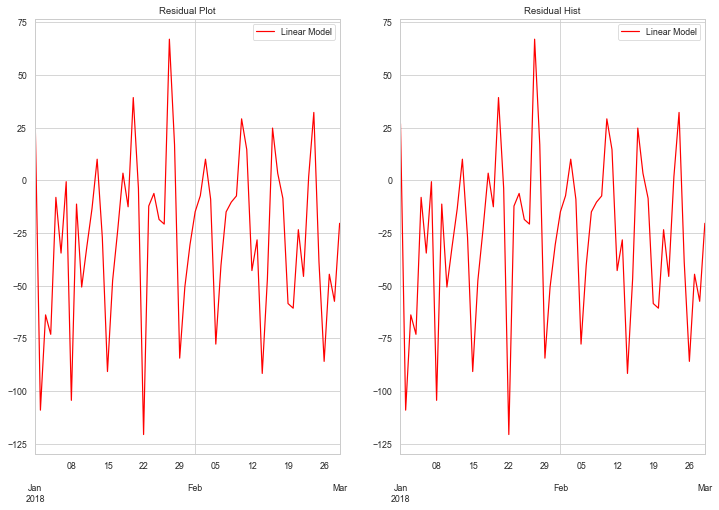

In [68]:
sns.set_theme("paper")
sns.set_style("whitegrid")
plt.style.use({'figure.figsize':(12, 8)})

plt.subplot(121)
plt.title("Residual Plot")
(LR_pred-y_test).plot(color='red',label='Linear Model')
plt.legend()
plt.subplot(122)
plt.title("Residual Hist")
(LR_pred-y_test).plot(color='red',label='Linear Model')
plt.legend()

In [69]:
import statsmodels.api as sm
X = sm.add_constant(X_train)
X=pd.DataFrame(X)
model = sm.OLS(list(y_train),X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     78.16
Date:                Thu, 20 May 2021   Prob (F-statistic):           2.68e-55
Time:                        09:18:17   Log-Likelihood:                -2002.4
No. Observations:                 365   AIC:                             4017.
Df Residuals:                     359   BIC:                             4040.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           31.5597      8.778      3.595      0.000      14.296      48.823
1 day before     0.5206      0.053      9.831      0.000       0.416       0.625
2 day before     0.1379      0.054      2.562      0.011       0.032       0.244
5 day before     0.1336      0.046      2.918      0.004       0.044       0.224
Last 1 Month    -0.0006      0.001     -1.148      0.252      -0.002       0.000
Last 2 Month     0.0002      0.000      0.482      0.630      -0.000       0.001
==============================================================================
Omnibus:                      690.565   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           563501.596
Skew:                          11.755   Prob(JB):                         0.00
Kurtosis:                     194.048   Cond. No.                     4.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
from sklearn.neural_network import MLPRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
selection=[]
for i in range(1,4):
    selection.append((i,))
for i in range(1,4):
    for j in range(1,i):
        selection.append((i,j))
pipe = make_pipeline(StandardScaler(), MLPRegressor(max_iter=40000,))
params = [{'mlpregressor__activation' : ['identity', 'logistic', 'tanh', 'relu'],
        "mlpregressor__hidden_layer_sizes":selection}]
BP_reg = GridSearchCV(pipe, 
                  param_grid=params,
                  scoring='r2',
                  cv=KFold(n_splits=3, shuffle=True))
BP_reg=BP_reg.fit(X_train,y_train)
BP_pred=BP_reg.predict(X_test)

/Users/yu.zongxi/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yu.zongxi/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yu.zongxi/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yu.zongxi/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [71]:
BP_reg.best_params_

{'mlpregressor__activation': 'tanh', 'mlpregressor__hidden_layer_sizes': (3,)}

In [72]:
activation=params

In [73]:
activation=BP_reg.best_params_['mlpregressor__activation']
size=BP_reg.best_params_['mlpregressor__hidden_layer_sizes']

In [74]:
BP_reg=make_pipeline(StandardScaler(), MLPRegressor(max_iter=40000,activation=activation,hidden_layer_sizes=size))
BP_reg=BP_reg.fit(X_train,y_train)
BP_pred=BP_reg.predict(X_test)

/Users/yu.zongxi/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(


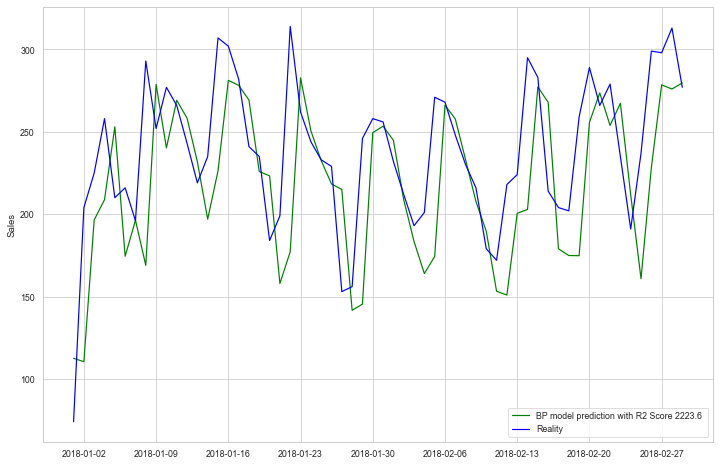

In [75]:
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme("paper")
sns.set_style("whitegrid")
sns.lineplot(x=X_test.index,y=BP_pred,label='BP model prediction with R2 Score %.1f '%(mean_squared_error(BP_pred,y_test)),color='green')
sns.lineplot(x=X_test.index,y=y_test,label='Reality',color='blue')
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())

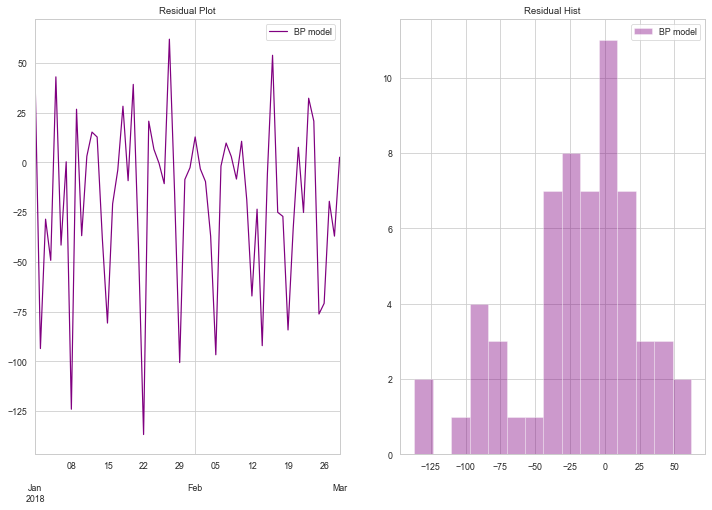

In [76]:
plt.subplot(121)
plt.title("Residual Plot")
(BP_pred-y_test).plot(color='purple',label='BP model')
plt.legend()
plt.subplot(122)
plt.title("Residual Hist")
(BP_pred-y_test).hist(bins=15,color='purple',alpha=0.4,label='BP model')
plt.legend()

In [77]:
from sklearn.ensemble import AdaBoostRegressor
DT_with_AdaBoost_reg=make_pipeline(StandardScaler(), AdaBoostRegressor()).fit(X_train,y_train)
DT_with_AdaBoost_pred=DT_with_AdaBoost_reg.predict(X_test)

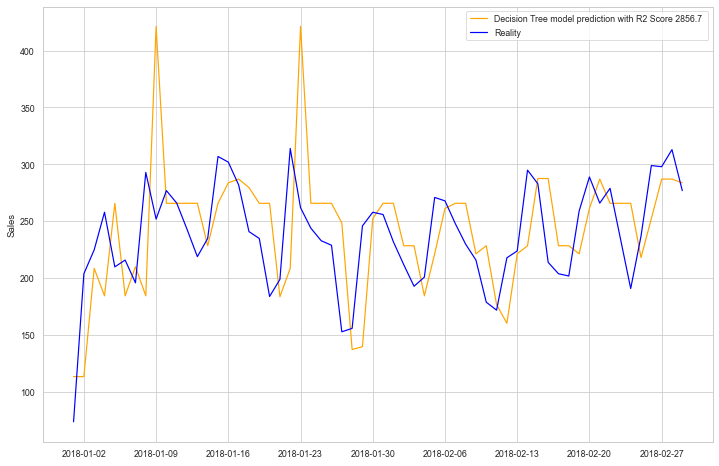

In [78]:
sns.set_theme("paper")
sns.set_style("whitegrid")
sns.lineplot(x=X_test.index,y=DT_with_AdaBoost_pred,label='Decision Tree model prediction with R2 Score %.1f '%(mean_squared_error(DT_with_AdaBoost_pred,y_test)),color='orange')
sns.lineplot(x=X_test.index,y=y_test,label='Reality',color='blue')
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())

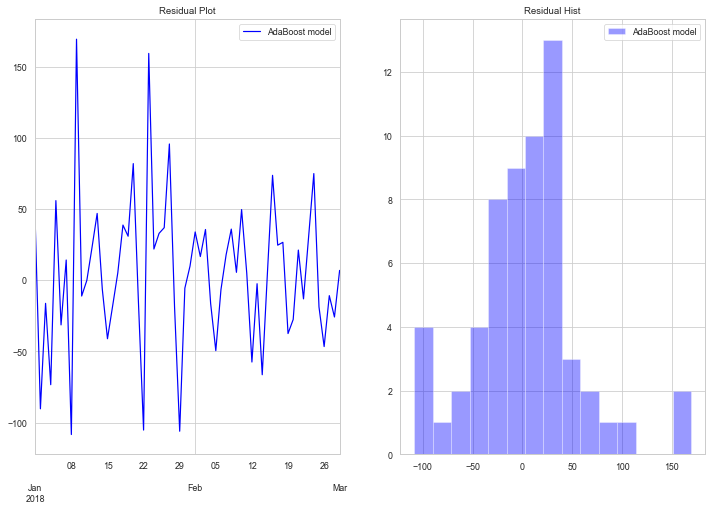

In [79]:
plt.subplot(121)
plt.title("Residual Plot")
(DT_with_AdaBoost_pred-y_test).plot(color='blue',label='AdaBoost model')

plt.legend()
plt.subplot(122)
plt.title("Residual Hist")
(DT_with_AdaBoost_pred-y_test).hist(bins=15,color='blue',alpha=0.4,label='AdaBoost model')
plt.legend()

In [80]:
from sklearn.ensemble import StackingRegressor
Stacking_reg=StackingRegressor(estimators=[('BP', BP_reg),('Linear Regression', make_pipeline(StandardScaler(), LinearRegression()))], final_estimator=LinearRegression())
Stacking_reg=Stacking_reg.fit(X_train,y_train)
Stacking_pred=Stacking_reg.predict(X_test)

/Users/yu.zongxi/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yu.zongxi/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yu.zongxi/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yu.zongxi/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(


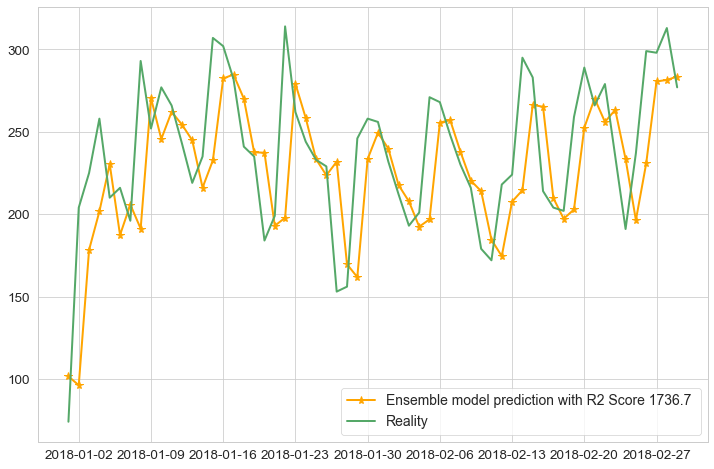

In [81]:
plt.dpi=200
plt.plot(X_test.index,Stacking_pred,'*-',color='orange',linewidth=2,markersize=8,label='Ensemble model prediction with R2 Score %.1f '%(mean_squared_error(Stacking_pred,y_test)))
plt.plot(X_test.index,y_test,'g',label='Reality',linewidth=2)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.legend(fontsize=14)
plt.tick_params(labelsize=13.5)
                

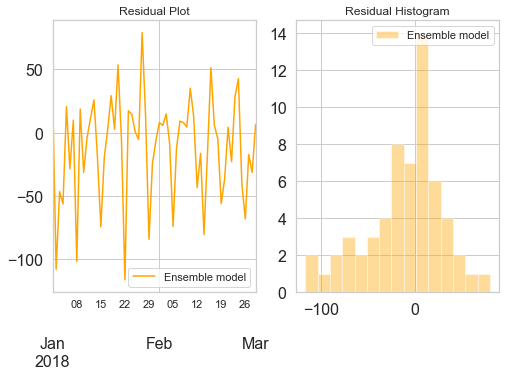

In [82]:
plt.style.use({'figure.figsize':(8,5)})
sns.set_style("whitegrid")
sns.set_context("notebook")


plt.subplot(121)
plt.title("Residual Plot")
(Stacking_pred-y_test).plot(color='orange',label='Ensemble model')
plt.tick_params(labelsize=16)
plt.legend()

plt.subplot(122)
plt.title("Residual Histogram")
(Stacking_pred-y_test).hist(bins=15,color='orange',alpha=0.4,label='Ensemble model')
plt.tick_params(labelsize=16)
plt.legend()